In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('fivethirtyeight')


Bad key "text.kerning_factor" on line 4 in
C:\Users\ASUS VivoBook\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# 차원축소
from sklearn.preprocessing import *

# 군집화
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster 

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

In [3]:
import os
sns.set_style("ticks")

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 군집화로 나누어진 시장들 비교

In [6]:
market=pd.read_csv('마지막_군집_4.csv',encoding='CP949')

In [7]:
market

,Unnamed: 0,시장명,위도,경도,시도명,시군구명,5일장,복합장,상설장,점포수,...,농산물이 주요품목,시구 미성년자,시구 젊은청년,시구 소득인구,시구 노년인구,동별 미성년자,동별 젊은청년,동별 소득인구,동별 노년인구,지하철역
0,118,양양5일장,2008612.309,1098704.617,강원도,양양군,1,0,0,200,...,1,3195,3436,13001,8314,2010,1794,5990,2755,0
1,161,삼척번개시장,1937865.943,1148705.038,강원도,삼척시,0,0,1,53,...,1,8995,9747,29929,16572,789,1026,3592,2312,0
2,218,동쪽바다중앙시장,1951102.217,1142274.206,강원도,동해시,0,0,1,200,...,1,15442,13150,43708,18293,272,359,1584,1353,0
3,266,도계전두시장,1915234.418,1137020.328,강원도,삼척시,0,0,1,62,...,1,8995,9747,29929,16572,1086,2090,4166,2702,0
4,277,화천재래시장,2011223.321,1018214.607,강원도,화천군,0,0,1,100,...,0,3588,5431,10229,5609,1483,1699,3634,1611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1349,부강상가시장,1887454.460,1077625.148,충청북도,단양군,0,0,1,23,...,0,3202,3130,13797,9026,1584,1601,5120,2310,0
348,1354,매포전통시장,1892880.629,1071286.966,충청북도,단양군,0,1,0,52,...,1,3202,3130,13797,9026,673,657,2480,1609,0
349,1434,농산물종합시장,1889279.357,1037834.724,충청북도,충주시,0,0,1,257,...,0,33464,34904,99966,41852,1269,1109,3336,968,0
350,1541,제천고추시장,1906319.179,1060126.718,충청북도,제천시,0,0,1,86,...,0,20435,20434,62893,29256,3150,3658,8510,2672,0


In [18]:
market[['시도명','시군구명']].value_counts().to_csv('value.csv', encoding='cp949')

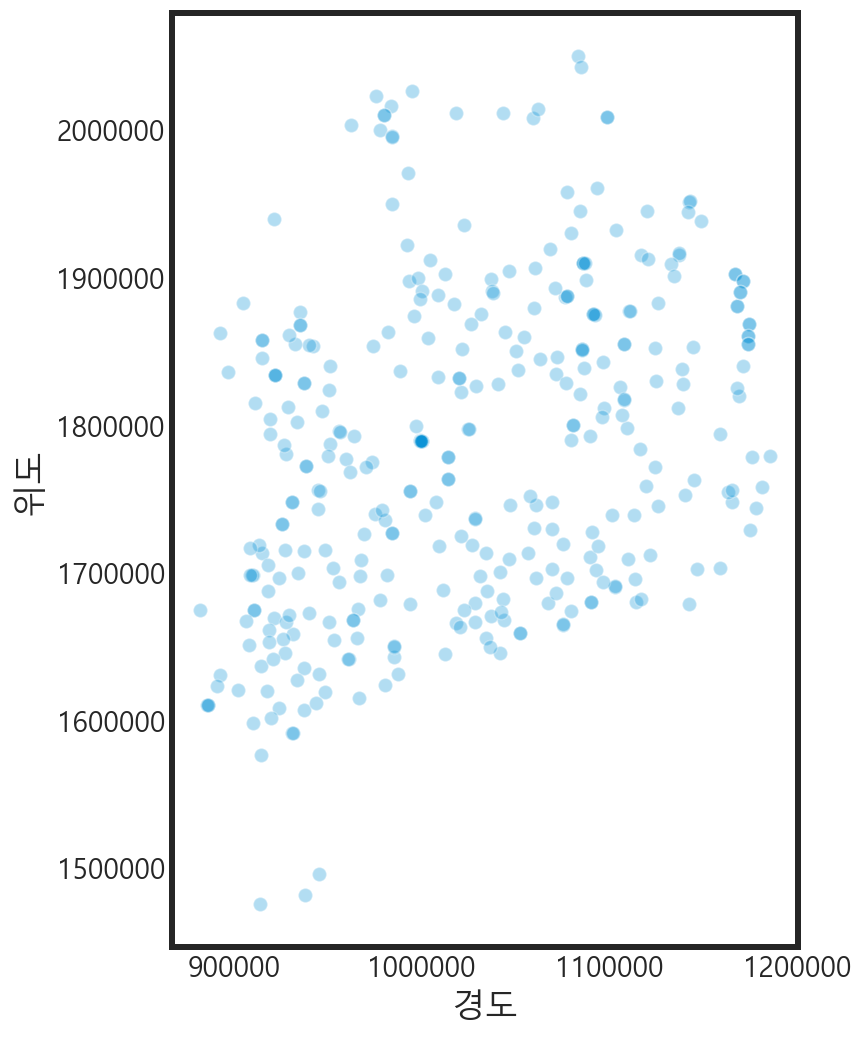

In [8]:
fig, axs = plt.subplots(figsize=(5, 8), squeeze=False)
#
sns.set_context("poster", font_scale = .7)
sns.scatterplot(x='경도', y='위도', alpha=0.3 ,s=50,  palette='blue', data=market)

- 0번군집 : 인적이 많은 대도시와 그 주변 위성도시에 분포하고 있다.
- 1번군집 : 전국적으로 분포하고 있으며 나름 규모가 큰 시장들이다. 
- 2번군집 : 대도시에 위치하고 있는 대형시장이 군집으로 나뉘었다.
- 3번군집 : 인적이 아주 드문 교외지역에 소규모 시장이 분포하고 있다.

1번 군집과 3번 군집이 상대적으로 다른 군집에 비해 시장 규모와 주변시설이 낙후되어 보인다.

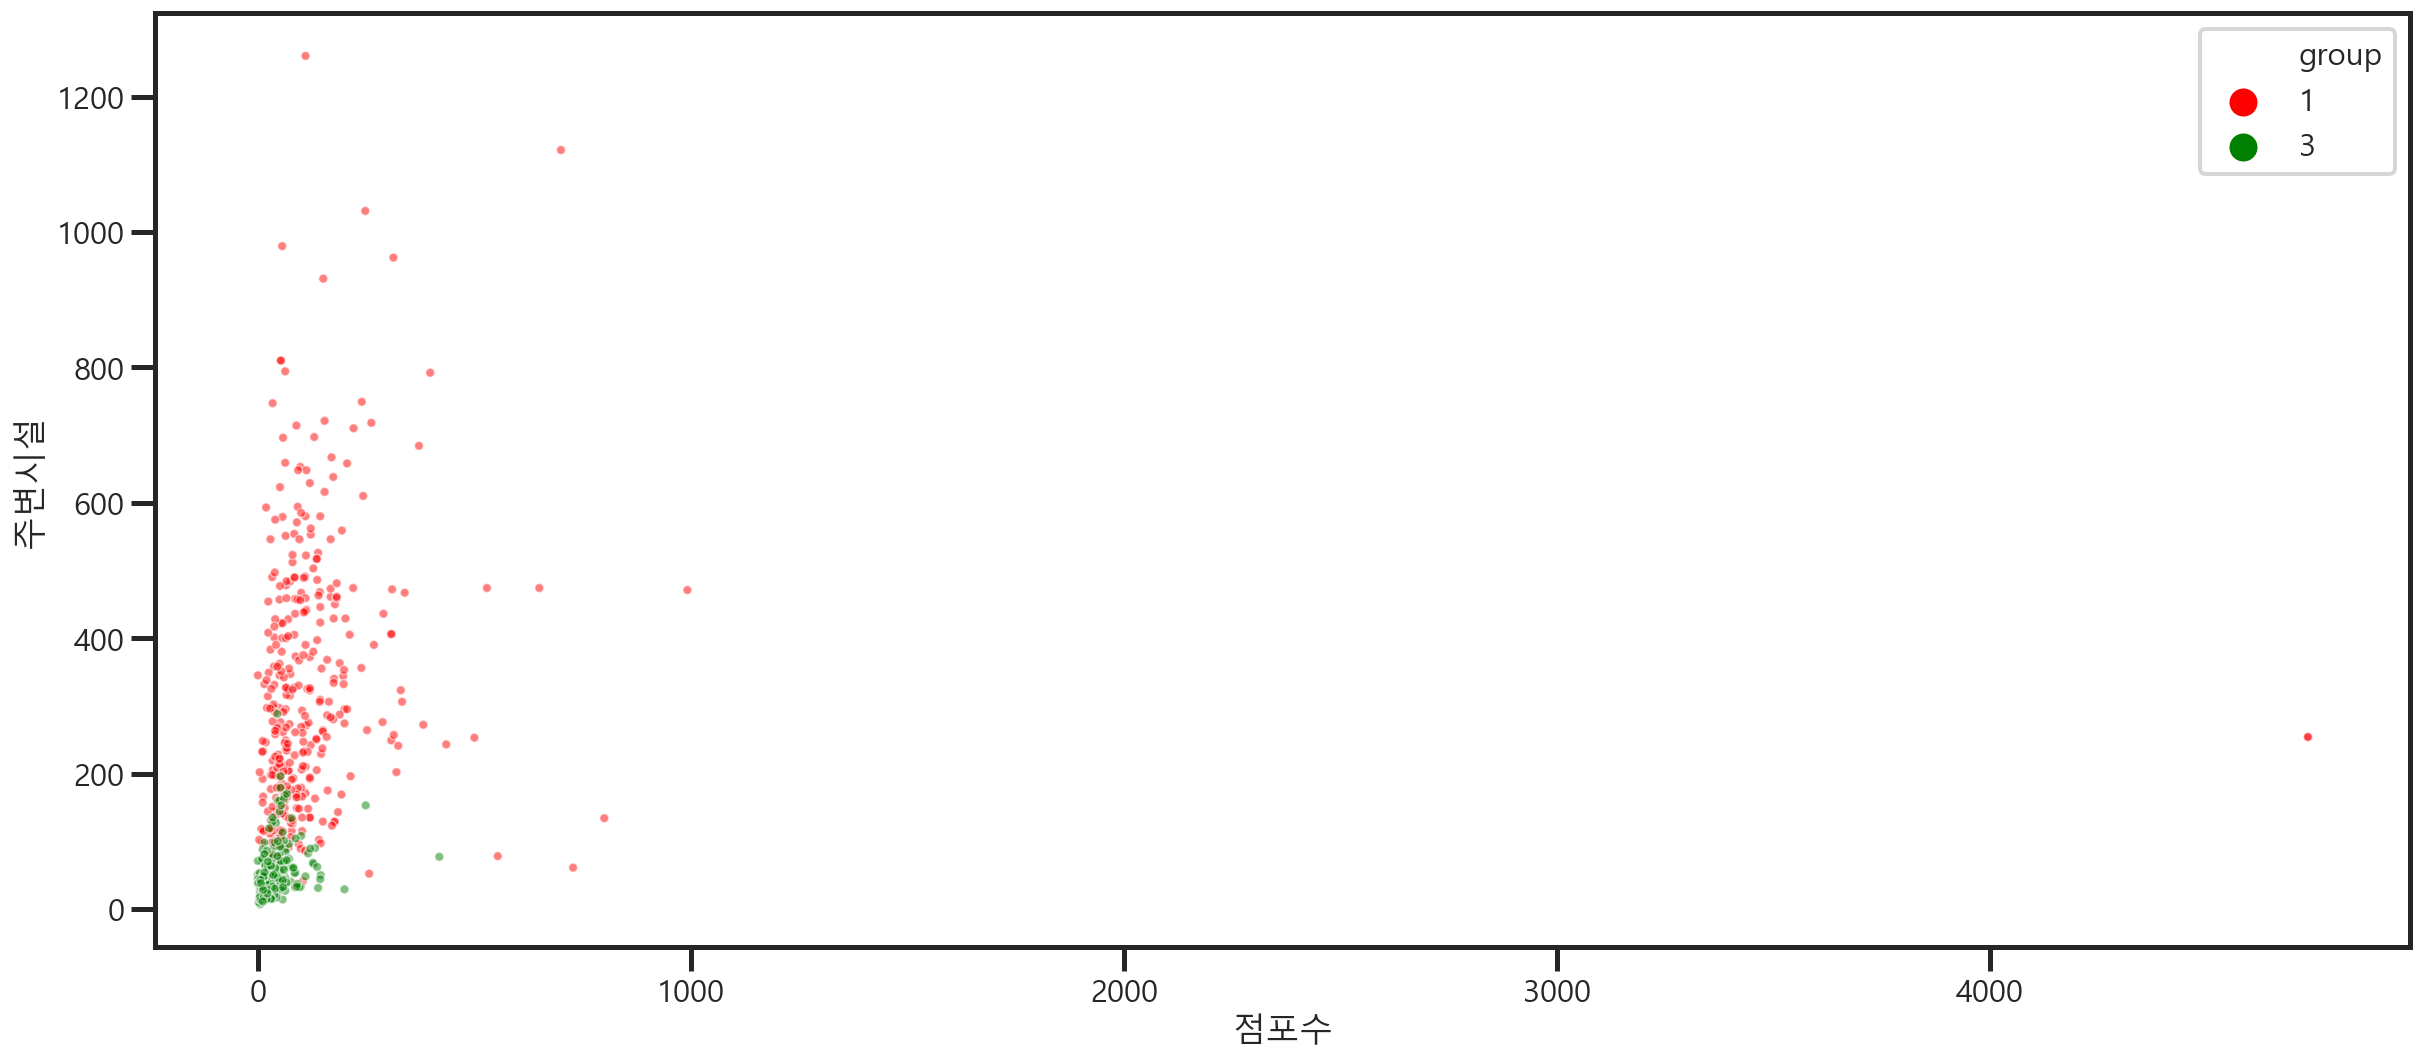

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,8))
sns.scatterplot(x='점포수', y='주변시설', alpha=0.5 ,s=20, palette=['red', 'green'],
                hue='group',data=market[(market['group']==1)|(market['group']==3)])

(0, 500)

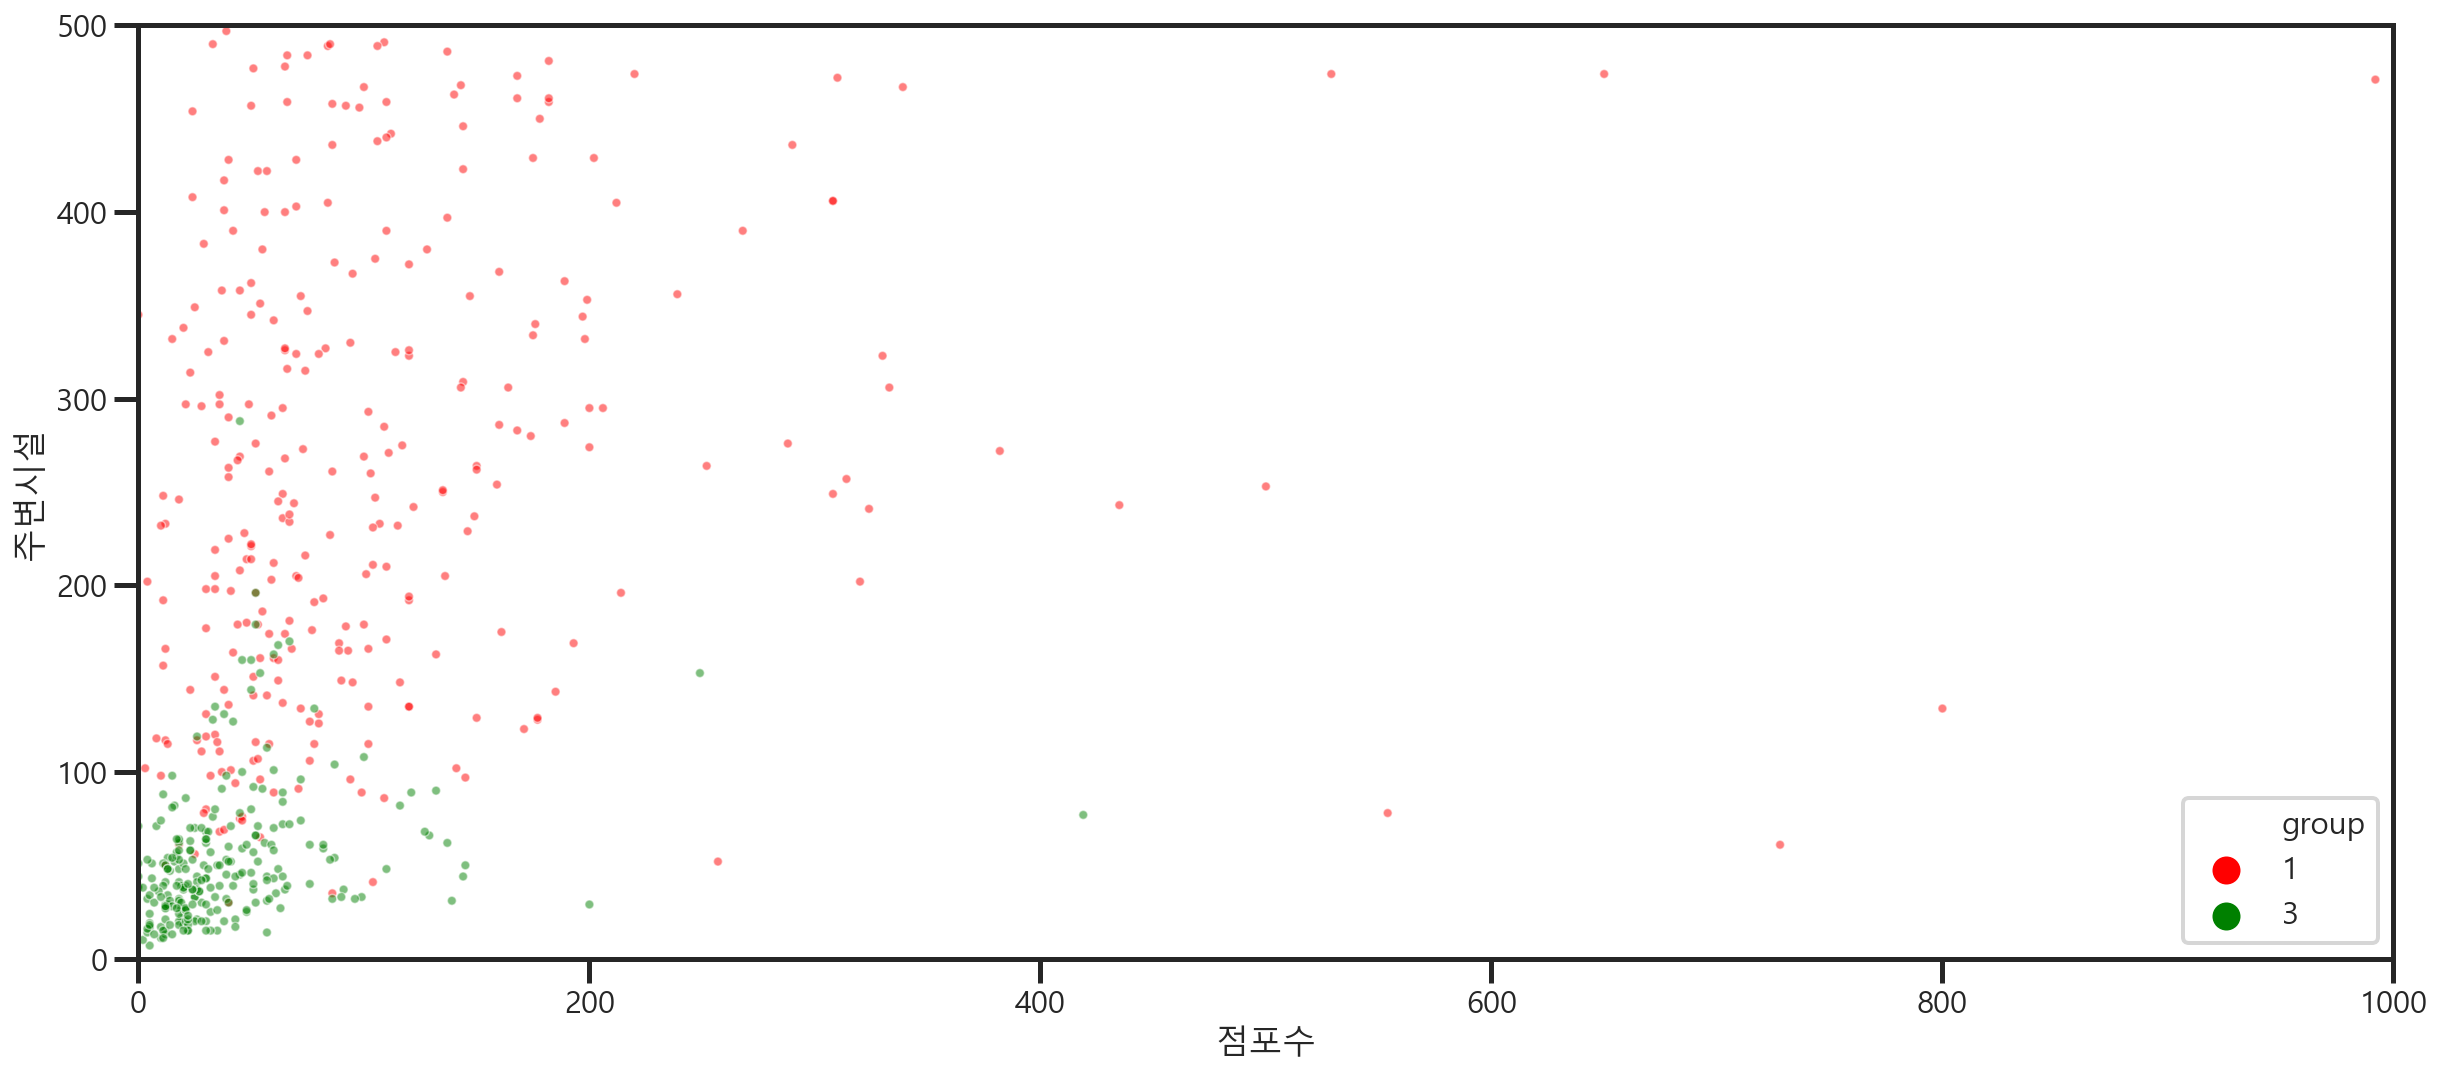

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,8))
s=sns.scatterplot(x='점포수', y='주변시설', alpha=0.5 ,s=20, palette=['red', 'green'],
                hue='group',data=market[(market['group']==1)|(market['group']==3)])
s.set_xlim(left=0, right=1000)
s.set_ylim(bottom=0, top=500)


1km 내에 있는 주변시설의 수와 시장의 점포수를 비교해본 결과 3번 그룹보다는 1번그룹이 주변 인프라 확립은 나아보인다. 하지만 두 군집 모두 0번과 2번 군집에 비해 유동인구가 낮고 주변시설이 적었다. 따라서 중위험군인 1번그룹과 고위험군인 3번그룹 두 군집을 선택하여 시장 개선방안을 적용해보고자 한다. 

In [11]:
market.columns

Index(['Unnamed: 0', 'index', '시장명', '위도', '경도', '시도명', '시군구명', '5일장', '복합장',
       '상설장', '점포수', '공중화장실보유여부', '주차장보유여부', '운영기간', '대형마트', '주차장', '지하철역',
       '학교', '편의점', '주유소,충전소', '문화시설', '관광명소', '음식점', '카페', '공시지가', '행정동 인구',
       '행정시구 인구', '시도별 소득월액', '농산물이 주요품목', '시구 미성년자', '시구 젊은청년', '시구 소득인구',
       '시구 노년인구', '동별 미성년자', '동별 젊은청년', '동별 소득인구', '동별 노년인구', 'group', '주변시설'],
      dtype='object')

In [12]:
crisis_market=market[(market['group']==1)|(market['group']==3)].loc[
    :,['시장명','시도명', '시군구명','대형마트', '주차장', '지하철역', '학교','편의점', '주유소,충전소', '문화시설', '관광명소', '음식점', '카페']]

In [13]:
crisis_market.head()

,시장명,시도명,시군구명,대형마트,주차장,지하철역,학교,편의점,"주유소,충전소",문화시설,관광명소,음식점,카페
900,부여중앙시장,충청남도,부여군,2,51,0,4,19,2,14,4,366,50
901,김제시장,전라북도,김제시,2,66,0,5,18,4,6,2,317,58
902,가남시장,경기도,여주시,1,5,0,2,13,3,0,1,138,23
903,일동5일장,경기도,포천시,2,10,0,3,7,2,0,2,136,15
904,운천5일장,경기도,포천시,2,5,0,3,6,1,1,0,102,11


In [14]:
crisis_market['시도명'].value_counts()

경상북도       128
전라남도        90
경상남도        85
충청남도        74
전라북도        56
강원도         45
충청북도        41
경기도         30
울산광역시       16
인천광역시        9
부산광역시        9
제주특별자치도      8
대구광역시        4
세종특별자치시      3
대전광역시        1
광주광역시        1
Name: 시도명, dtype: int64

## 스타벅스 주위환경 비교

In [15]:
star=pd.read_csv('스타벅스_주위환경.csv',encoding='CP949')

In [16]:
star.head()

,0,지점명,대형마트,주차장,지하철역,학교,편의점,"주유소,충전소",문화시설,관광명소,음식점,카페,주소,위도,경도,DT여부,시도명
0,1,구로호텔,4,122,1,9,136,8,7,2,1634,257,"서울특별시 구로구 디지털로32길 72, 구로호텔 1층 (구로동)",37.483129,126.898859,0,서울특별시
1,2,구로디지털타워,4,131,2,7,145,8,5,4,1824,290,서울특별시 구로구 디지털로32길 30 (구로동),37.483432,126.896480,0,서울특별시
2,3,구로디지털로,3,127,4,6,141,7,4,4,1883,267,"서울특별시 구로구 디지털로33길 11, 에이스테크노8차 1층 (구로동)",37.485911,126.895587,0,서울특별시
3,4,구로에이스,3,143,4,6,148,7,7,5,2021,316,"서울특별시 구로구 디지털로 285, 에이스트윈타워1차 103호 (구로동)",37.484483,126.894496,0,서울특별시
4,5,구로하이엔드,5,154,4,7,155,6,5,3,1932,366,"서울특별시 구로구 디지털로26길 5, 에이스하이엔드타워1차 103호 (구로동)",37.481618,126.893136,0,서울특별시


In [17]:
star['시도명'].value_counts()

서울특별시      518
경기도        308
부산광역시      109
대구광역시       66
광주광역시       57
경상남도        52
인천광역시       51
대전광역시       49
경상북도        41
충청남도        31
울산광역시       28
강원도         23
충청북도        23
전라북도        21
제주특별자치도     21
전라남도        18
세종특별자치시      8
Name: 시도명, dtype: int64

In [18]:
crisis_market['시도명'].value_counts().index[0:]

Index(['경상북도', '전라남도', '경상남도', '충청남도', '전라북도', '강원도', '충청북도', '경기도', '울산광역시',
       '인천광역시', '부산광역시', '제주특별자치도', '대구광역시', '세종특별자치시', '대전광역시', '광주광역시'],
      dtype='object')

In [19]:
star_=star[(star['시도명']!='서울특별시')]

In [20]:
star_infra=star_.loc[:,['지점명','대형마트', '주차장', '지하철역', '학교','편의점', '주유소,충전소', '문화시설', '관광명소', '음식점', '카페']]

In [21]:
crisis_market_=crisis_market.loc[:,['시장명','대형마트', '주차장', '지하철역', '학교','편의점', '주유소,충전소', '문화시설', '관광명소', '음식점', '카페']]

In [22]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(crisis_market_.iloc[:,1:])
x_MinMaxScaler=minMaxScaler.transform(crisis_market_.iloc[:,1:])
market_scale=pd.DataFrame(data=x_MinMaxScaler,columns=crisis_market_.iloc[:,1:].columns)

x_MinMaxScaler=minMaxScaler.transform(star_infra.iloc[:,1:])
star_scale=pd.DataFrame(data=x_MinMaxScaler,columns=star_infra.iloc[:,1:].columns)

In [23]:
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('실루엣 계수')
    plt.show()


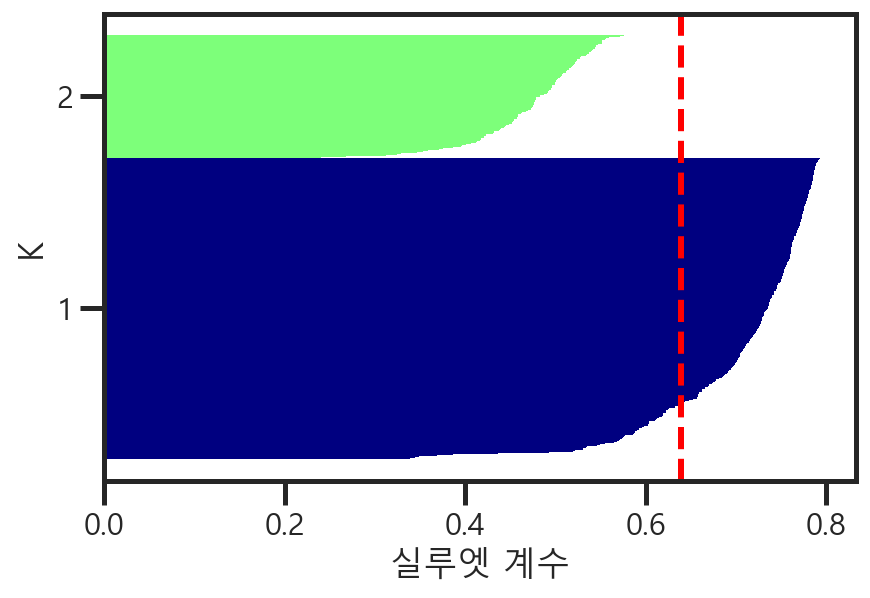

silhouette_samples( ) return 값의 shape (600,)
data의 그룹별 Silhouette Analysis Score:0.571
cluster
0    0.664493
1    0.341892
Name: silhouette_coeff, dtype: float64


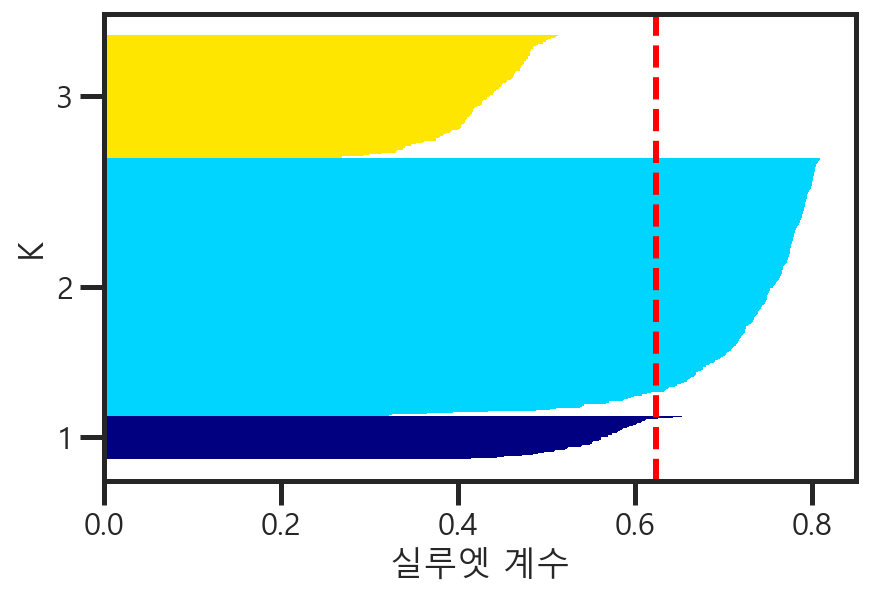

silhouette_samples( ) return 값의 shape (600,)
data의 그룹별 Silhouette Analysis Score:0.412
cluster
0    0.591890
1    0.635261
2   -0.118222
Name: silhouette_coeff, dtype: float64


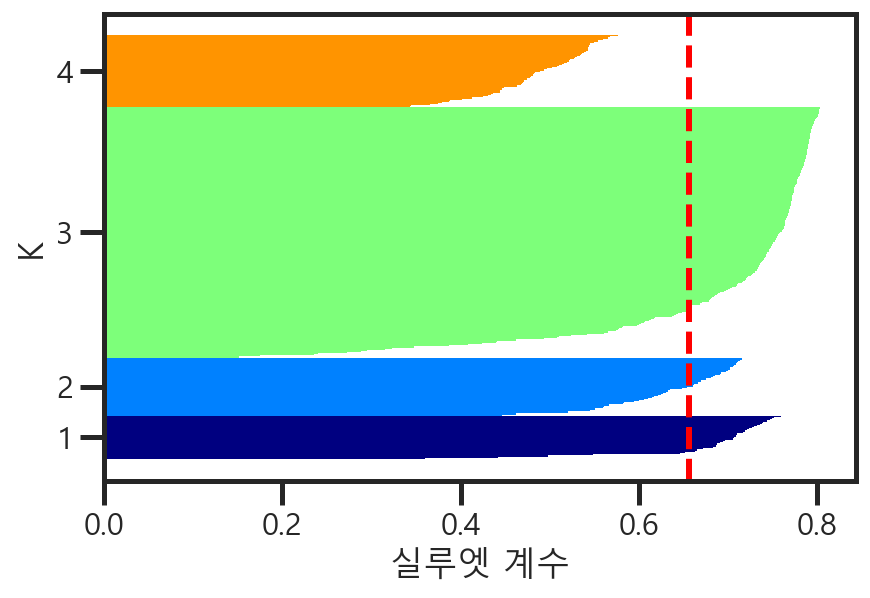

silhouette_samples( ) return 값의 shape (600,)
data의 그룹별 Silhouette Analysis Score:0.458
cluster
0    0.141364
1   -0.040798
2    0.676232
3    0.297192
Name: silhouette_coeff, dtype: float64


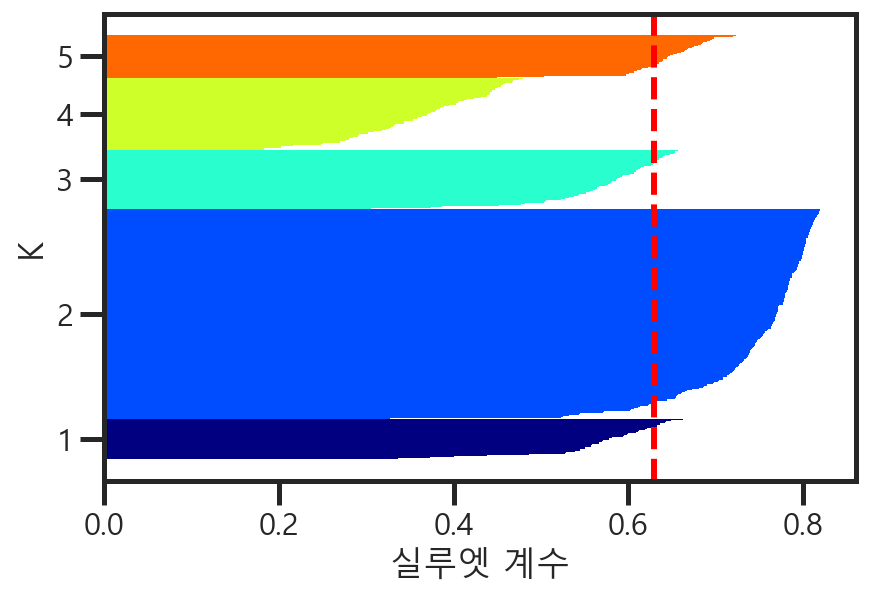

silhouette_samples( ) return 값의 shape (600,)
data의 그룹별 Silhouette Analysis Score:0.388
cluster
0    0.685313
1    0.563143
2   -0.138139
3    0.297192
4    0.120635
Name: silhouette_coeff, dtype: float64


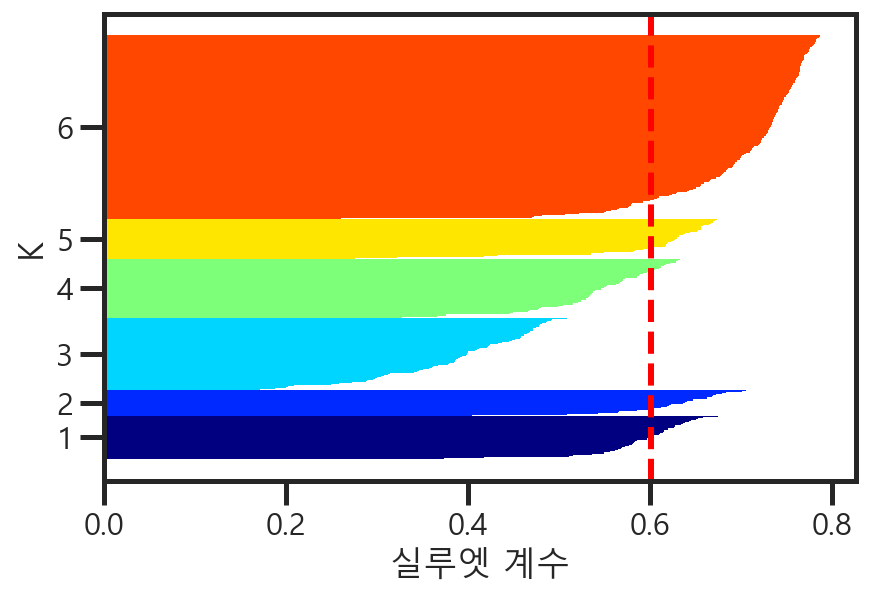

silhouette_samples( ) return 값의 shape (600,)
data의 그룹별 Silhouette Analysis Score:0.338
cluster
0    0.120635
1    0.579513
2    0.297192
3   -0.138139
4    0.293962
5    0.532726
Name: silhouette_coeff, dtype: float64


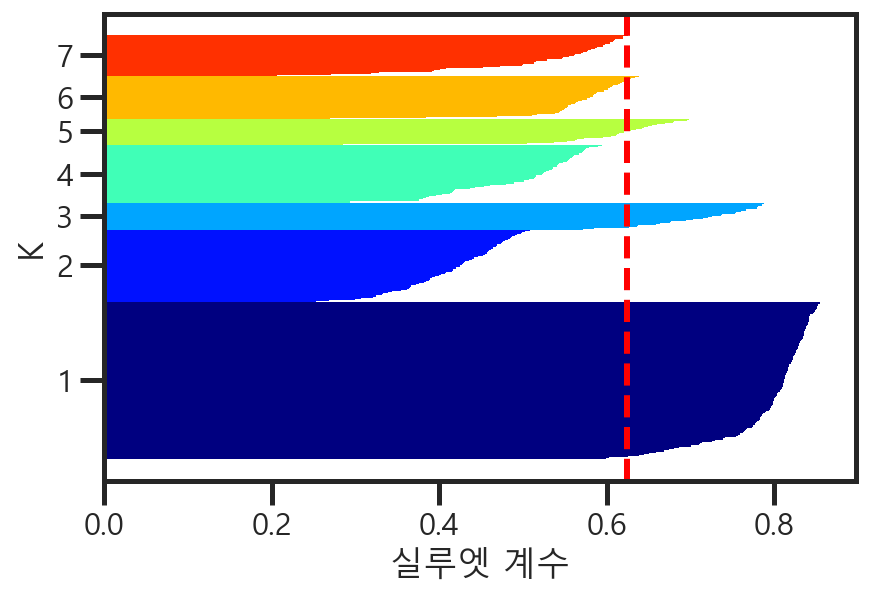

silhouette_samples( ) return 값의 shape (600,)
data의 그룹별 Silhouette Analysis Score:0.302
cluster
0    0.462031
1    0.297192
2    0.395269
3   -0.138139
4    0.557852
5    0.120635
6    0.293962
Name: silhouette_coeff, dtype: float64


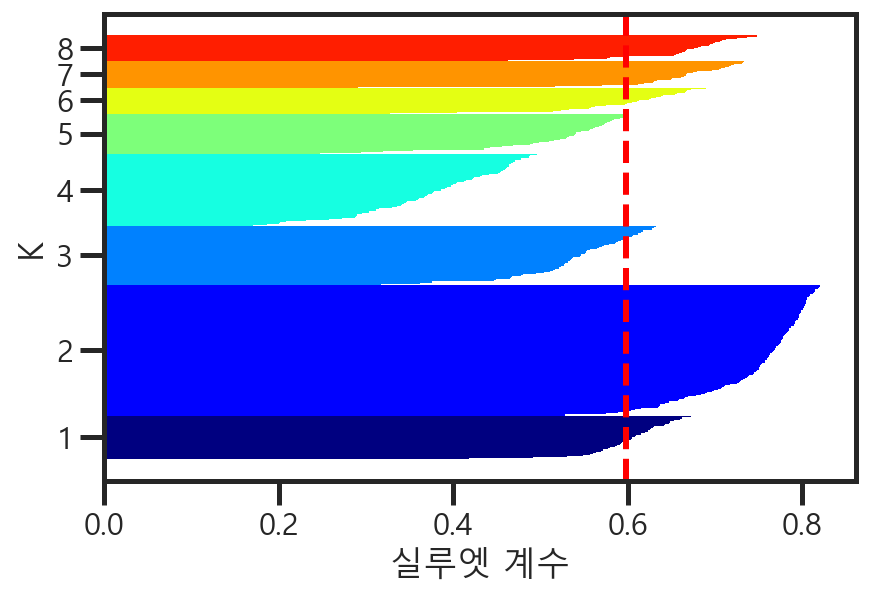

silhouette_samples( ) return 값의 shape (600,)
data의 그룹별 Silhouette Analysis Score:0.260
cluster
0    0.120635
1    0.374915
2   -0.138139
3    0.297192
4    0.293962
5    0.395269
6    0.342075
7    0.432232
Name: silhouette_coeff, dtype: float64


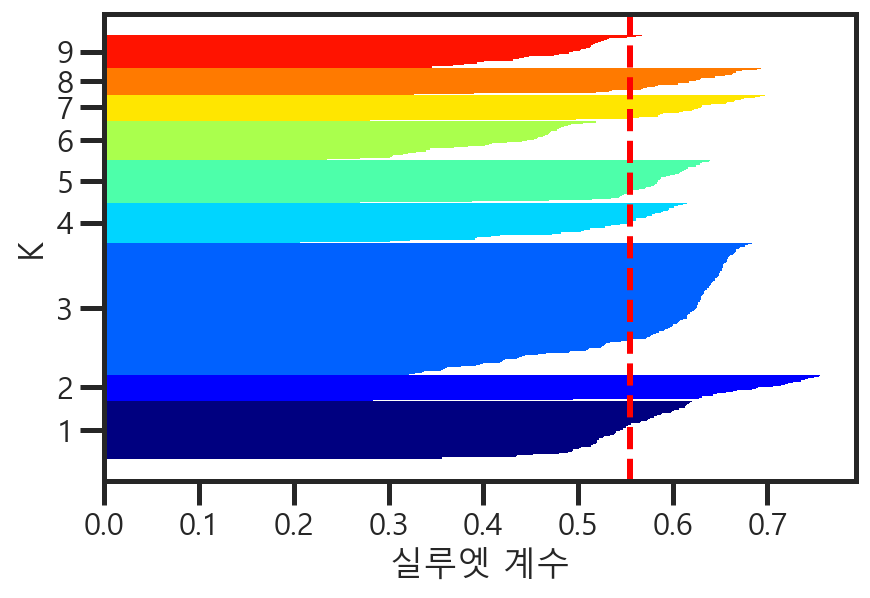

silhouette_samples( ) return 값의 shape (600,)
data의 그룹별 Silhouette Analysis Score:0.206
cluster
0   -0.138139
1    0.432232
2    0.374915
3    0.293962
4    0.118133
5   -0.116296
6    0.342075
7    0.395269
8    0.093596
Name: silhouette_coeff, dtype: float64


In [24]:
range_n_clusters = [2, 3, 4, 5, 6 ,7, 8, 9]

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300,random_state=0).fit(market_scale)
    kmeans.fit(market_scale)

    market_scale['cluster'] = kmeans.labels_
    plotSilhouette(market_scale, kmeans.labels_)
    
    # 모든 개별 데이터에 실루엣 계수값을 구함. 
    score_samples = silhouette_samples(crisis_market_.iloc[:,1:], market_scale['cluster'])
    print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

    # 실루엣 계수 컬럼 추가
    market_scale['silhouette_coeff'] = score_samples

    # 모든 데이터의 평균 실루엣 계수값을 구함. 
    average_score = silhouette_score(crisis_market_.iloc[:,1:], market_scale['cluster'])
    print('data의 그룹별 Silhouette Analysis Score:{0:.3f}'.format(average_score))

    print(market_scale.groupby('cluster')['silhouette_coeff'].mean())

실루엣 계수가 가장 높은 2개의 군집으로 나누어 데이터를 확인한다

In [25]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300,random_state=0).fit(market_scale)
kmeans.fit(market_scale)

market_scale['cluster'] = kmeans.labels_

In [26]:
star_=star_.reset_index()

star_scale['cluster']=star_['DT여부']

In [27]:
market_scale.groupby('cluster').mean()

,대형마트,주차장,지하철역,학교,편의점,"주유소,충전소",문화시설,관광명소,음식점,카페,silhouette_coeff
cluster,,,,,,,,,,,
0,0.308861,0.244105,0.025316,0.324543,0.210127,0.176424,0.182037,0.134217,0.275570,0.185491,0.137091
1,0.244628,0.100740,0.008264,0.221763,0.065859,0.133437,0.084612,0.166470,0.087642,0.062043,0.250736


In [28]:
star_scale.groupby('cluster').mean()

,대형마트,주차장,지하철역,학교,편의점,"주유소,충전소",문화시설,관광명소,음식점,카페
cluster,,,,,,,,,,
0,0.599400,0.481024,1.242879,0.610070,0.651874,0.214487,0.564254,0.210323,0.793984,0.764017
1,0.463598,0.324596,0.652720,0.525453,0.484073,0.300732,0.271070,0.127914,0.546068,0.437067


DT매장과 일반매장을 비교해보니
- 대형마트가 적은곳
- 주유소, 충전소가 많은곳
- 주차장이 적은곳
- 학교가 적은곳
- 편의점이 적은곳에 위치하고 있다.
- 음식점과 카페가 적은곳에 위치하고 있다.

In [29]:
star_['적을수록_DT']=0
star_['많을수록_DT']=0

for x in range(len(star_)):
    star_['적을수록_DT'].iloc[x]=star_.loc[x,['지하철역', '학교', '편의점', '문화시설', '대형마트', '주차장', '관광명소']].sum()
    star_['많을수록_DT'].iloc[x]=star_.loc[x,['주유소,충전소']].sum()
    

C:\Users\ASUS VivoBook\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
market=market.reset_index()
market['적을수록_DT']=0
market['많을수록_DT']=0

for x in range(len(market)):
    market['적을수록_DT'].iloc[x]=market.loc[x,['지하철역', '학교', '편의점', '문화시설', '대형마트', '주차장', '관광명소']].sum()
    market['많을수록_DT'].iloc[x]=market.loc[x,['주유소,충전소']].sum()

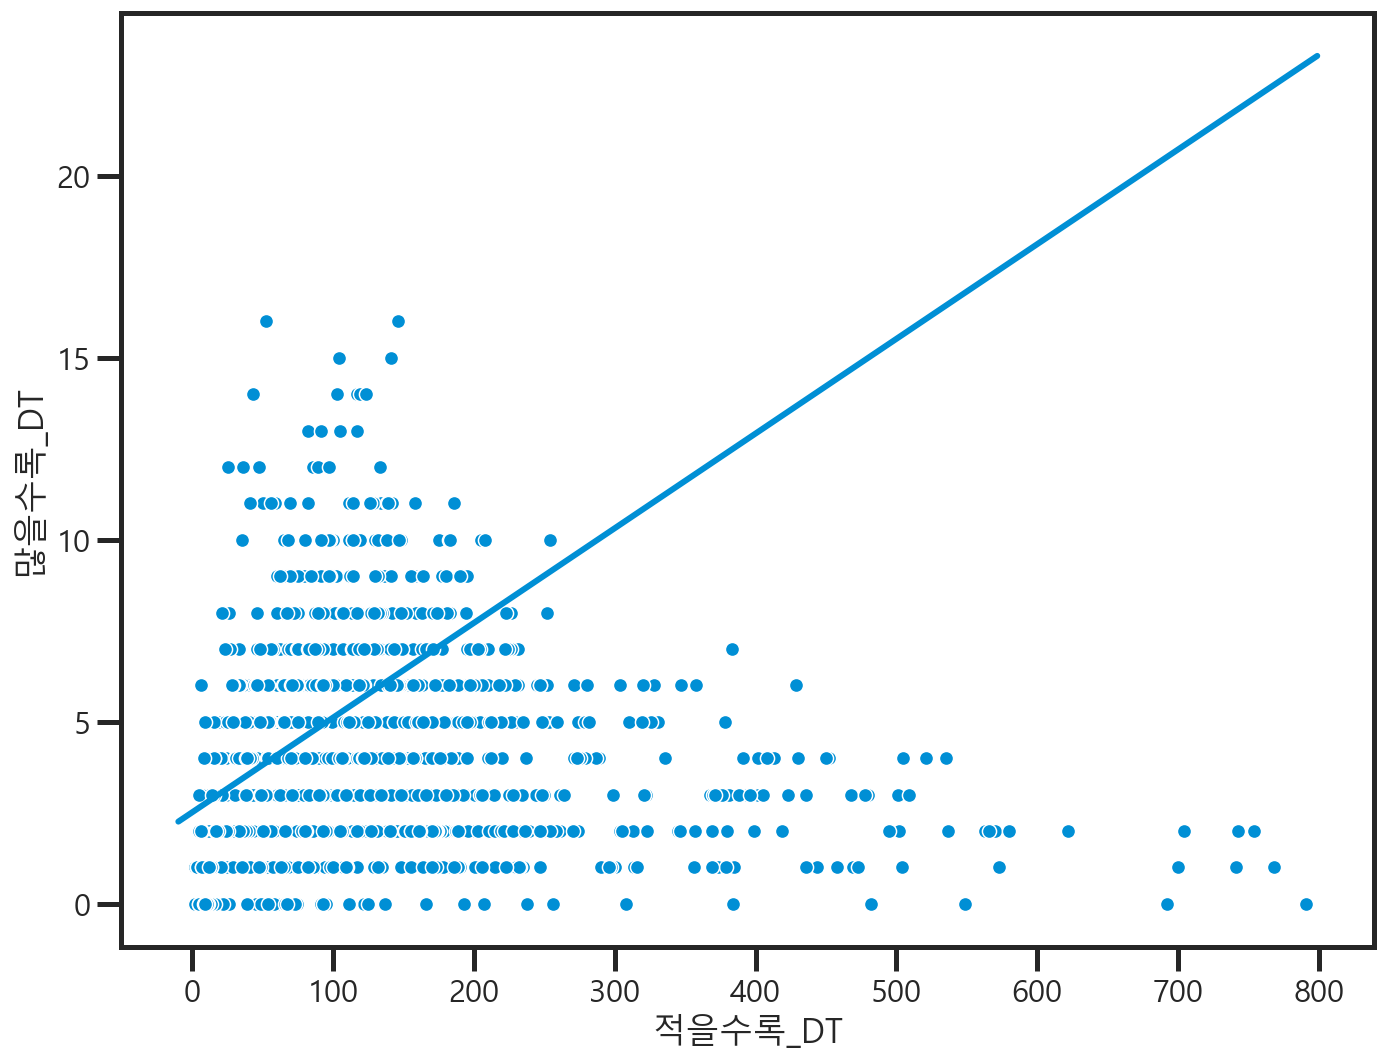

In [88]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,8))
sns.scatterplot(x='적을수록_DT', y='많을수록_DT', alpha=1 ,s=50, palette=['red', 'orange'],
                data=market)

x = np.arange(-10,800) 
y = 0.026*x + 2.520
plt.plot(x, y)

In [ ]:
y > 0.026*x='적을수록_DT' + 2.520





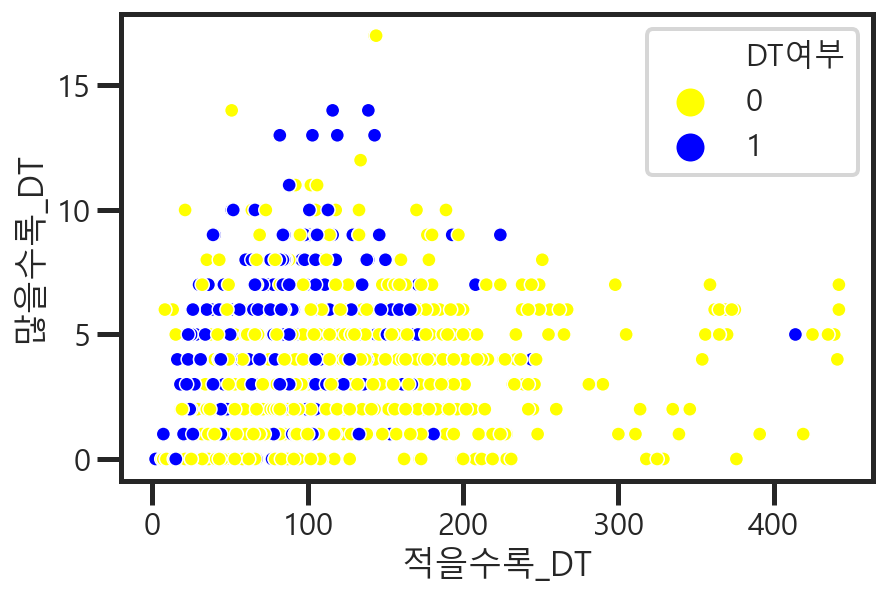

In [32]:
scatter1=sns.scatterplot(x='적을수록_DT', y='많을수록_DT', alpha=1 ,s=50,  palette=['yellow', 'blue'],
                hue='DT여부',data=star_)

In [33]:
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
star_[['적을수록_DT','많을수록_DT']]

,적을수록_DT,많을수록_DT
0,89,0
1,51,10
2,52,4
3,40,1
4,98,3
...,...,...
901,65,1
902,62,0
903,54,1
904,19,2


In [35]:
DT=star_[star_['DT여부']==1]
DT=DT[DT['적을수록_DT']<300]
x_data1 = sm.add_constant(DT['적을수록_DT'], has_constant = "add")

multi_model = sm.OLS(DT['많을수록_DT'], x_data1)
fitted_multi_model = multi_model.fit()

fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                많을수록_DT   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     25.07
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.08e-06
Time:                        20:15:11   Log-Likelihood:                -574.30
No. Observations:                 238   AIC:                             1153.
Df Residuals:                     236   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2312      0.361      8.946      0.000       2.520       3.943
적을수록_DT        0.0189      0.004      5.007      0.000       0.011       0.026
==============================================================================
Omnibus:                       16.733   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.147
Skew:                           0.640   Prob(JB):                     0.000115
Kurtosis:                       3.436   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

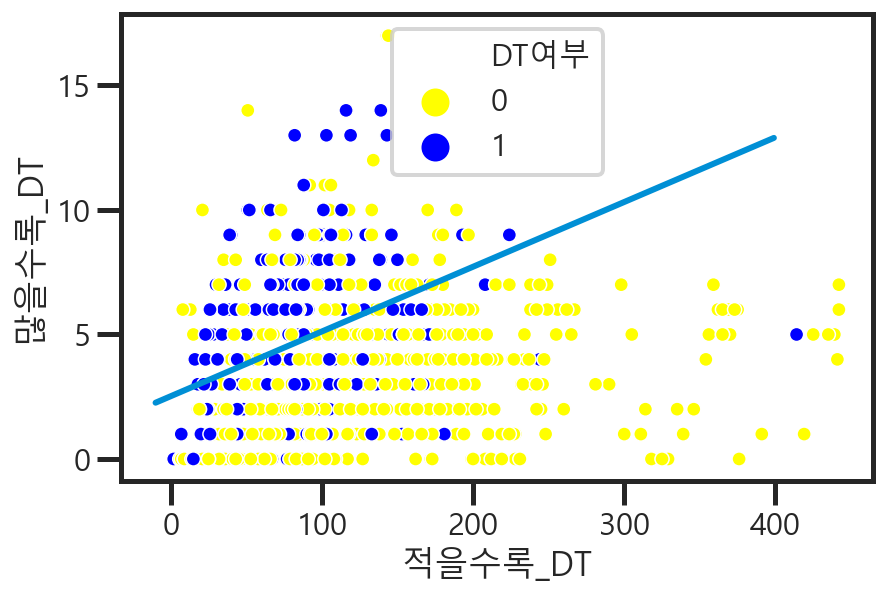

In [36]:
sns.scatterplot(x='적을수록_DT', y='많을수록_DT', alpha=1 ,s=50,  palette=['yellow', 'blue'], hue='DT여부',data=star_)
x = np.arange(-10,400) 
y = 0.026*x + 2.520
plt.plot(x, y)


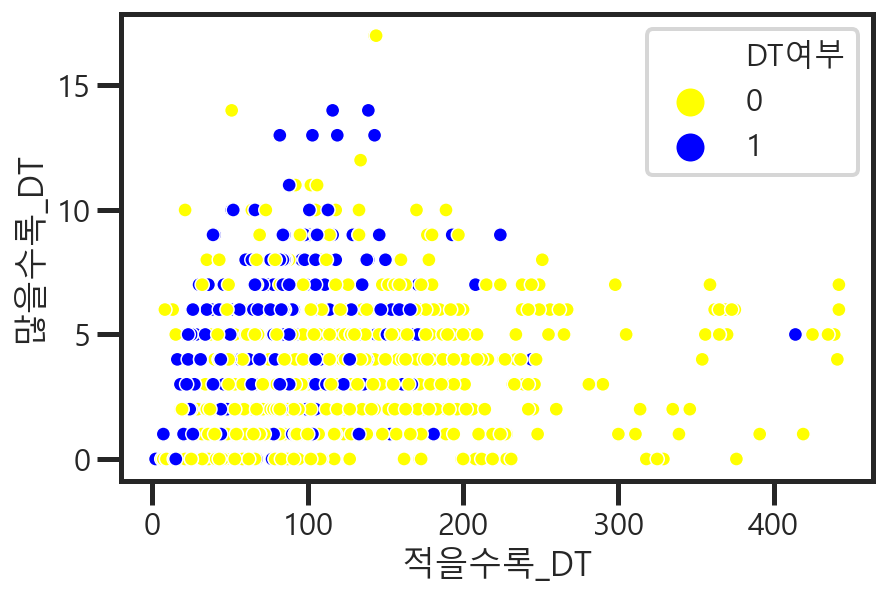

In [37]:
sns.scatterplot(x='적을수록_DT', y='많을수록_DT', alpha=1 ,s=50,  palette=['yellow', 'blue'], hue='DT여부',data=star_)


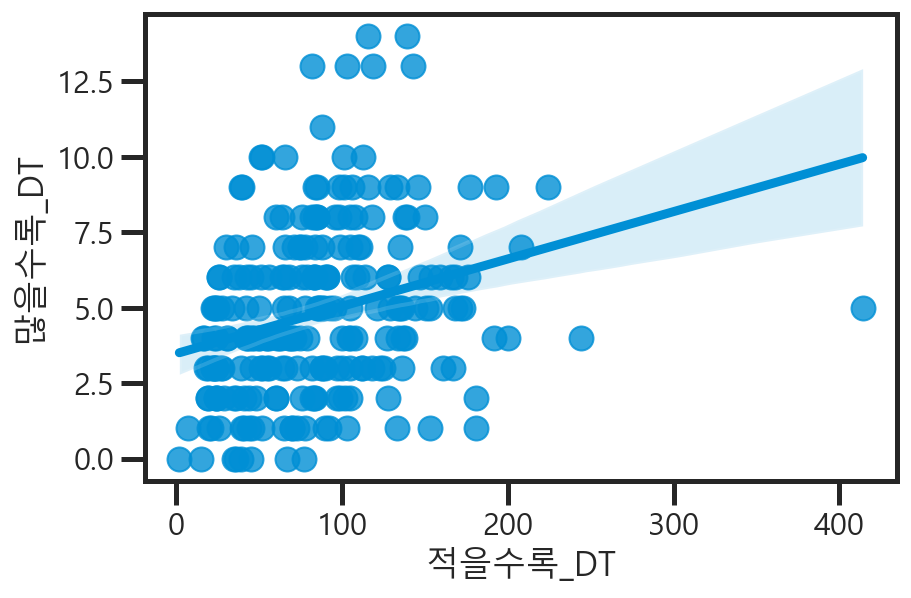

In [38]:
sns.regplot(x='적을수록_DT', y='많을수록_DT',data=star_[star_['DT여부']==1])


In [41]:
star.iloc[:,[2,3,4,5,6,7,8,9,10,11,15]]

,대형마트,주차장,지하철역,학교,편의점,"주유소,충전소",문화시설,관광명소,음식점,카페,DT여부
0,4,122,1,9,136,8,7,2,1634,257,0
1,4,131,2,7,145,8,5,4,1824,290,0
2,3,127,4,6,141,7,4,4,1883,267,0
3,3,143,4,6,148,7,7,5,2021,316,0
4,5,154,4,7,155,6,5,3,1932,366,0
...,...,...,...,...,...,...,...,...,...,...,...
1419,4,23,0,8,22,1,4,4,380,70,0
1420,8,11,0,9,27,0,3,4,311,65,0
1421,1,25,0,5,17,1,4,2,299,68,0
1422,1,2,0,4,5,2,0,7,49,7,0


In [55]:
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn import svm # support vector Machine
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics # accuracy measure(정확도)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier

In [45]:
train_X, test_X, train_Y, test_Y = train_test_split(star.iloc[:,[2,3,4,5,6,7,8,9,10,11]], star.iloc[:,15],
                                                    test_size=0.2, random_state=0)

In [75]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('The roc_auc_score of the NaiveBayes is',metrics.accuracy_score(prediction1,test_Y))

The roc_auc_score of the NaiveBayes is 0.6385964912280702


In [76]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('The roc_auc_score of the Logistic Regression is',metrics.accuracy_score(prediction2,test_Y))

The roc_auc_score of the Logistic Regression is 0.8280701754385965


C:\Users\ASUS VivoBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [80]:
crisis_market.iloc[:,3:]

,대형마트,주차장,지하철역,학교,편의점,"주유소,충전소",문화시설,관광명소,음식점,카페
900,2,51,0,4,19,2,14,4,366,50
901,2,66,0,5,18,4,6,2,317,58
902,1,5,0,2,13,3,0,1,138,23
903,2,10,0,3,7,2,0,2,136,15
904,2,5,0,3,6,1,1,0,102,11
...,...,...,...,...,...,...,...,...,...,...
1844,1,1,0,1,0,1,0,4,19,1
1845,1,1,0,3,2,1,0,6,64,22
1846,1,5,0,2,3,2,0,6,26,5
1847,1,0,0,2,2,2,0,1,23,1


In [81]:
model = LogisticRegression()
model.fit(star.iloc[:,[2,3,4,5,6,7,8,9,10,11]], star.iloc[:,15])
prediction2=model.predict(crisis_market.iloc[:,3:])

C:\Users\ASUS VivoBook\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
pd.DataFrame(prediction2)[0].value_counts()

0    394
1    206
Name: 0, dtype: int64

In [78]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The roc_auc_score of the Decision Tree is',metrics.accuracy_score(prediction3,test_Y))

The roc_auc_score of the Decision Tree is 0.7824561403508772


In [79]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The roc_auc_score of the rbf-SVM is',metrics.accuracy_score(prediction4,test_Y))

The roc_auc_score of the rbf-SVM is 0.8140350877192982


In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The roc_auc_score of the linear-SVM is',metrics.roc_auc_score(prediction5,test_Y))

In [71]:
model=svm.SVC(kernel='linear',C=0.05,gamma=0.1)
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The roc_auc_score of the linear-SVM is',metrics.roc_auc_score(prediction5,test_Y))

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [51]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The roc_auc_score of the KNN is',metrics.roc_auc_score(prediction6,test_Y))

The roc_auc_score of the KNN is 0.6516186516186516


In [52]:
model = MLPClassifier(solver='sgd', random_state=0, hidden_layer_sizes=(10, 10, 10))
#sgd, lbfgs, adam
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The roc_auc_score of the Neural Network is',metrics.roc_auc_score(prediction7,test_Y))

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [58]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_X,train_Y)
pred = rf_clf.predict(test_X)
print('The roc_auc_score of the random forest is',metrics.roc_auc_score(pred,test_Y))

The roc_auc_score of the random forest is 0.6204212454212454


In [59]:
ada=AdaBoostClassifier(random_state=0)
ada.fit(train_X,train_Y)
pred = ada.predict(test_X)
print('The cross validated score for AdaBoost is:',metrics.roc_auc_score(pred,test_Y))

The cross validated score for AdaBoost is: 0.6972534332084894


In [60]:
gbm=GradientBoostingClassifier(random_state=0)
gbm.fit(train_X,train_Y)
pred = gbm.predict(test_X)
print('The cross validated score for GBM is:',metrics.roc_auc_score(pred,test_Y))

The cross validated score for GBM is: 0.6826163301141351


In [61]:
XGBM=xgb.XGBClassifier(random_state=0)
XGBM.fit(train_X,train_Y)
pred = XGBM.predict(test_X)
print('The cross validated score for XGBM is:',metrics.roc_auc_score(pred,test_Y))

The cross validated score for XGBM is: 0.6836778639104221


In [66]:
LGBM=LGBMClassifier(random_state=0)
LGBM.fit(train_X,train_Y)
pred = LGBM.predict(test_X)
print('The cross validated score for LGBM is:',metrics.roc_auc_score(pred,test_Y))

LightGBMError: Do not support non-ASCII characters in feature name.

ValueError: Could not interpret input '근린상업시설'

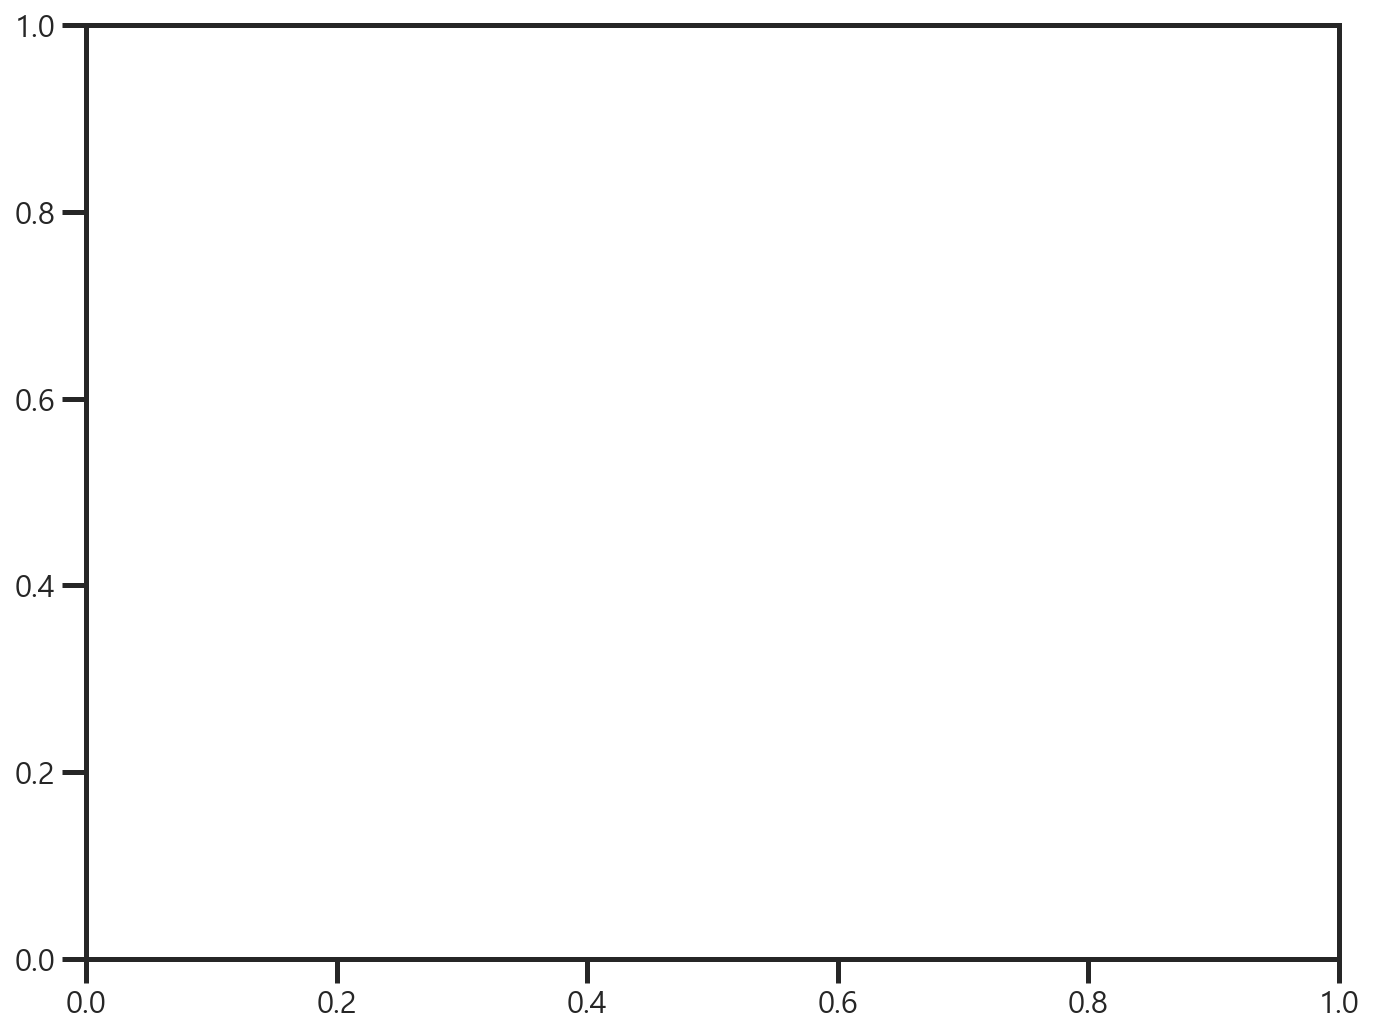

In [39]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,8))

scatter1=sns.scatterplot(x='근린상업시설', y='일반상업시설', alpha=1 ,s=50, palette=['yellow', 'blue'],
                hue='cluster',data=star_scale)
scatter1.set_xlim(left=0, right=3)
scatter1.set_ylim(bottom=0, top=3)


In [ ]:
star_scale

In [ ]:
infra

In [ ]:
infra=star_.iloc[:,[3,4,5,6,7,8,9,10,11,12,16]]

In [86]:
def histp(i):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,4))
    sns.distplot(infra[infra['DT여부']==0].iloc[:,i],color='blue', ax=ax[0], label="일반매장")
    sns.distplot(infra[infra['DT여부']==1].iloc[:,i],color='red', ax=ax[0], label="DT매장")
    
    sns.distplot(infra[infra['DT여부']==0].iloc[:,i+5],color='blue', ax=ax[1], label="일반매장")
    sns.distplot(infra[infra['DT여부']==1].iloc[:,i+5],color='red', ax=ax[1], label="DT매장")
    plt.legend()

NameError: name 'infra' is not defined

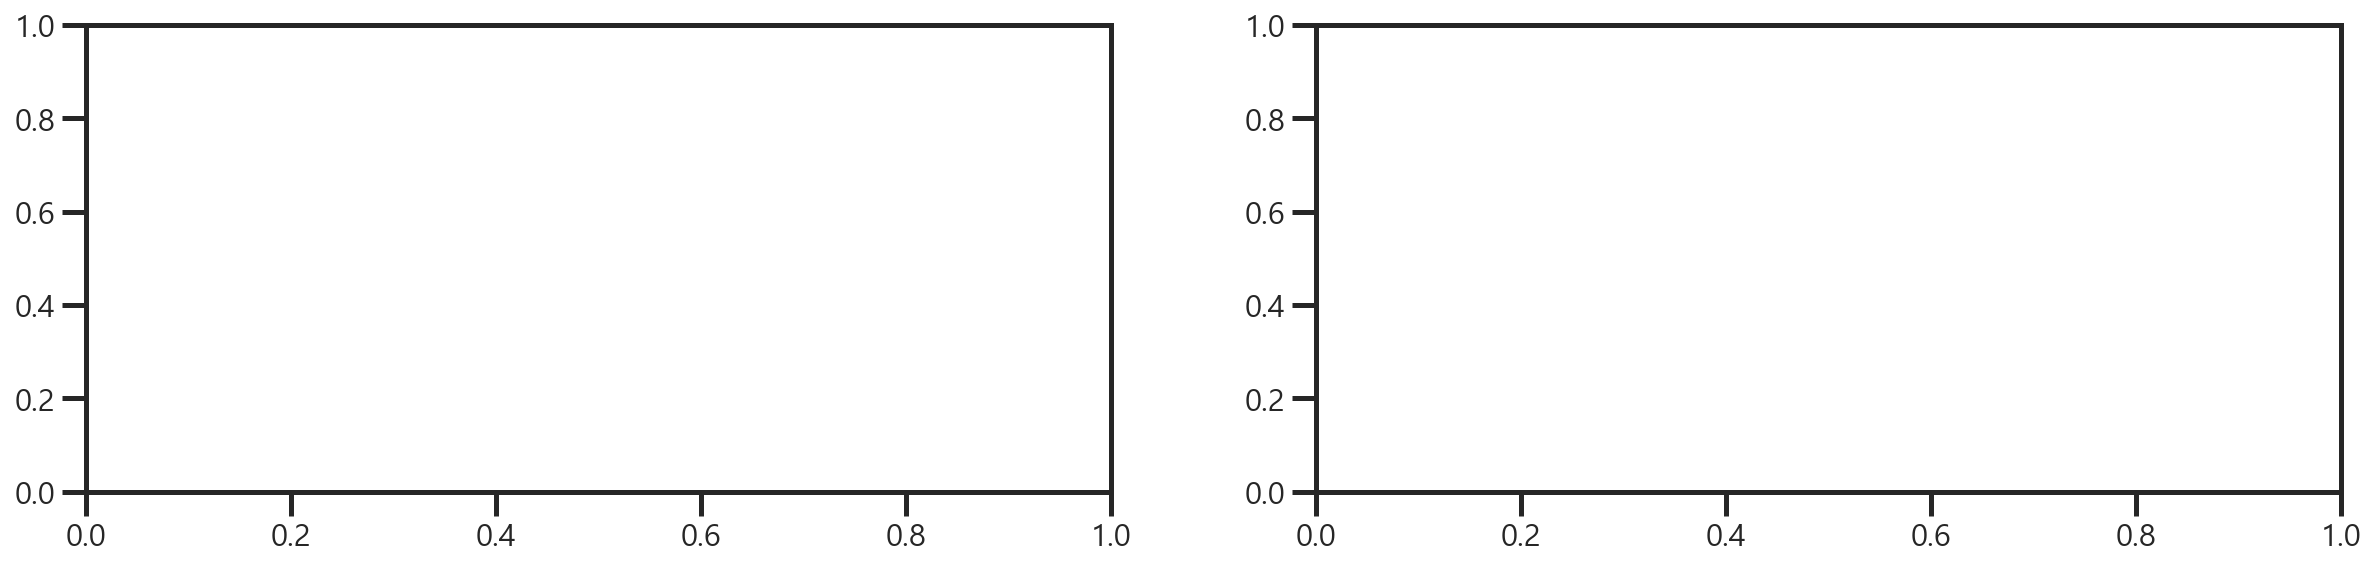

In [87]:
for x in range(5):
    histp(x)

DT매장과 일반매장을 비교해보니
- 대형마트가 적은곳
- 주유소, 충전소가 많은곳
- 주차장이 적은곳
- 지하철역이 적은곳
- 학교가 적은곳
- 편의점이 적은곳에 위치하고 있다.
- 음식점과 카페가 적은곳에 위치하고 있다.

In [ ]:
sns.pairplot(infra, hue='DT여부',kind='reg')
plt.show()